In [ ]:
import pandas as pd
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file into a pandas DataFrame
df = pd.read_csv('/content/merged_data_cleaned_test_updated1.csv')

# Display the first 5 rows of the DataFrame
display(df.head())

,source,location,hotel_link,hotel_name,room_type,room_class,bed_type,area_m2,max_people,final_price,facilities_cleaned
0,Booking,Hồ Chí Minh,https://www.booking.com/hotel/vn/elegant-retre...,Elegant Retreat Duplex W Private Pool,Căn Hộ 2 Tầng,Apartment,Double,120,7,118597279,"120 m², ban công, bếp, có sẵn 1 nôi tùy theo ..."
1,Booking,Hồ Chí Minh,https://www.booking.com/hotel/vn/elegant-retre...,Elegant Retreat Duplex W Private Pool,Căn Hộ 2 Tầng,Apartment,Double,120,6,116625043,"120 m², ban công, bếp, có sẵn 1 nôi tùy theo ..."
2,Booking,Hồ Chí Minh,https://www.booking.com/hotel/vn/elegant-retre...,Elegant Retreat Duplex W Private Pool,Căn Hộ 2 Tầng,Apartment,Double,120,5,114652802,"120 m², ban công, bếp, có sẵn 1 nôi tùy theo ..."
3,Booking,Hồ Chí Minh,https://www.booking.com/hotel/vn/elvita-landma...,Elvita Landmark Luxury Residence,Căn Hộ 3 Phòng Ngủ,Apartment,Mixed Beds,120,2,60000000,"120 m², 7 – dựa trên 22 đánh giá, ban công, bê..."
4,Booking,Hồ Chí Minh,https://www.booking.com/hotel/vn/elvita-landma...,Elvita Landmark Luxury Residence,Căn Hộ 3 Phòng Ngủ,Apartment,Mixed Beds,120,5,60000000,"120 m², 7 – dựa trên 22 đánh giá, ban công, bê..."


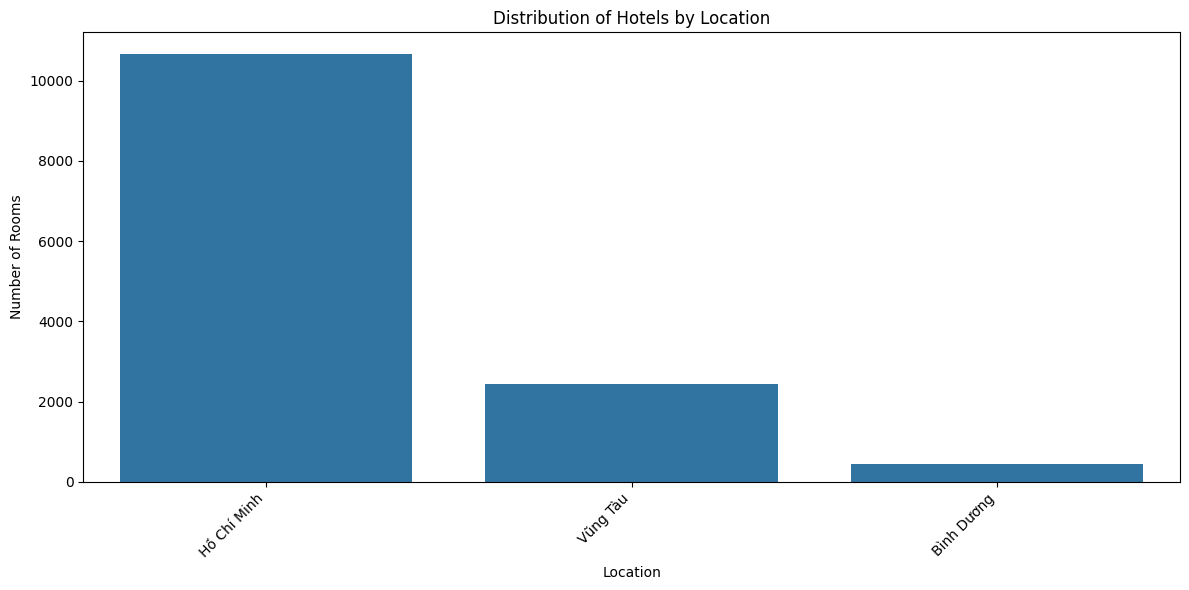

In [ ]:
# Create a count plot for the 'location' column
plt.figure(figsize=(12, 6)) # Adjust figure size for better readability
sns.countplot(data=df, x='location', order = df['location'].value_counts().index)
plt.title('Distribution of Hotels by Location')
plt.xlabel('Location')
plt.ylabel('Number of Rooms')
plt.xticks(rotation=45, ha='right') # Rotate labels to prevent overlap
plt.tight_layout() # Adjust layout
plt.show()

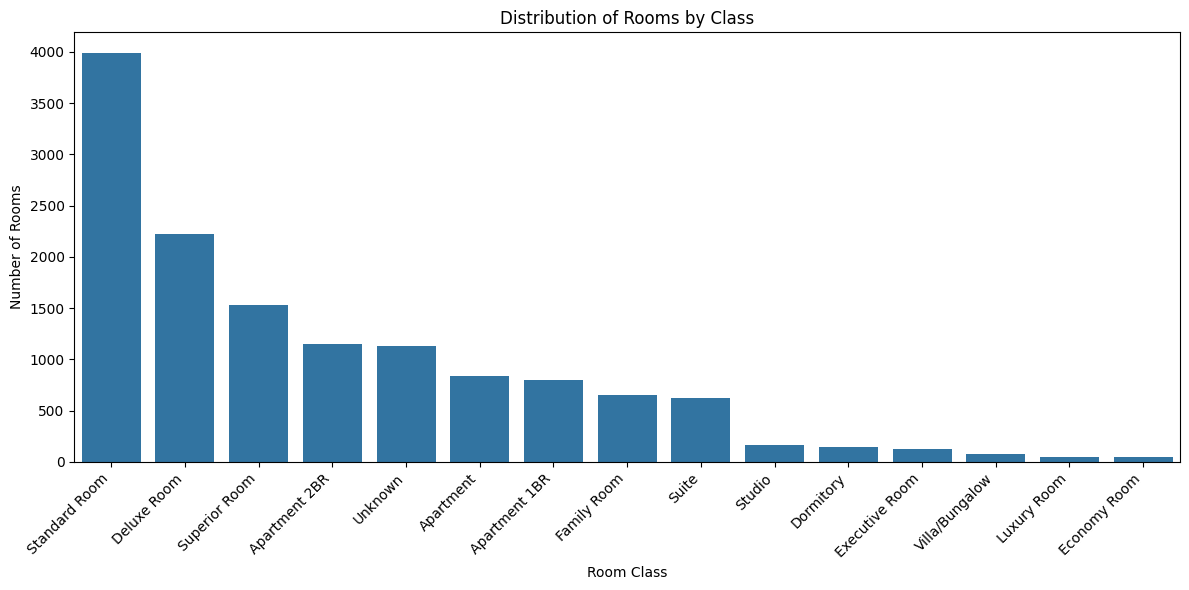

In [ ]:
# Create a count plot for the 'room_class' column
plt.figure(figsize=(12, 6)) # Adjust figure size for better readability
sns.countplot(data=df, x='room_class', order = df['room_class'].value_counts().index)
plt.title('Distribution of Rooms by Class')
plt.xlabel('Room Class')
plt.ylabel('Number of Rooms')
plt.xticks(rotation=45, ha='right') # Rotate labels to prevent overlap
plt.tight_layout() # Adjust layout
plt.show()

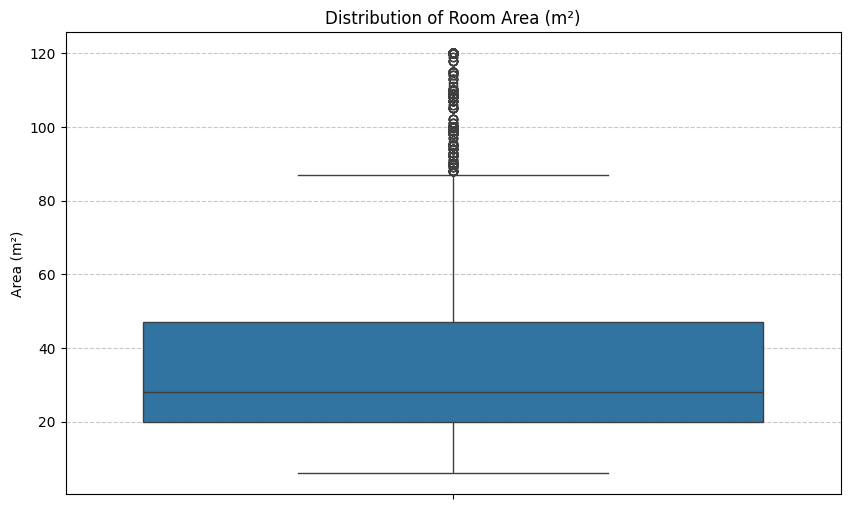

In [ ]:
# Create a boxplot for the 'area_m2' column
plt.figure(figsize=(10, 6))
sns.boxplot(y=df['area_m2'])
plt.title('Distribution of Room Area (m²)')
plt.ylabel('Area (m²)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

- Median ~ 25–30 m² → diện tích phòng phổ biến là phòng nhỏ–trung bình
- IQR ~ 20–45 m² → phần lớn dữ liệu tập trung trong khoảng này
- Nhiều outliers lớn (80–120 m²) → có phòng rất rộng (suite, apartment)
- Phân phối lệch phải (right-skewed)

-> Kiểm tra và loại giá trị không hợp lệ, xử lý outlier (capping hoặc gắn nhãn), áp dụng log/scale cho cột diện tích

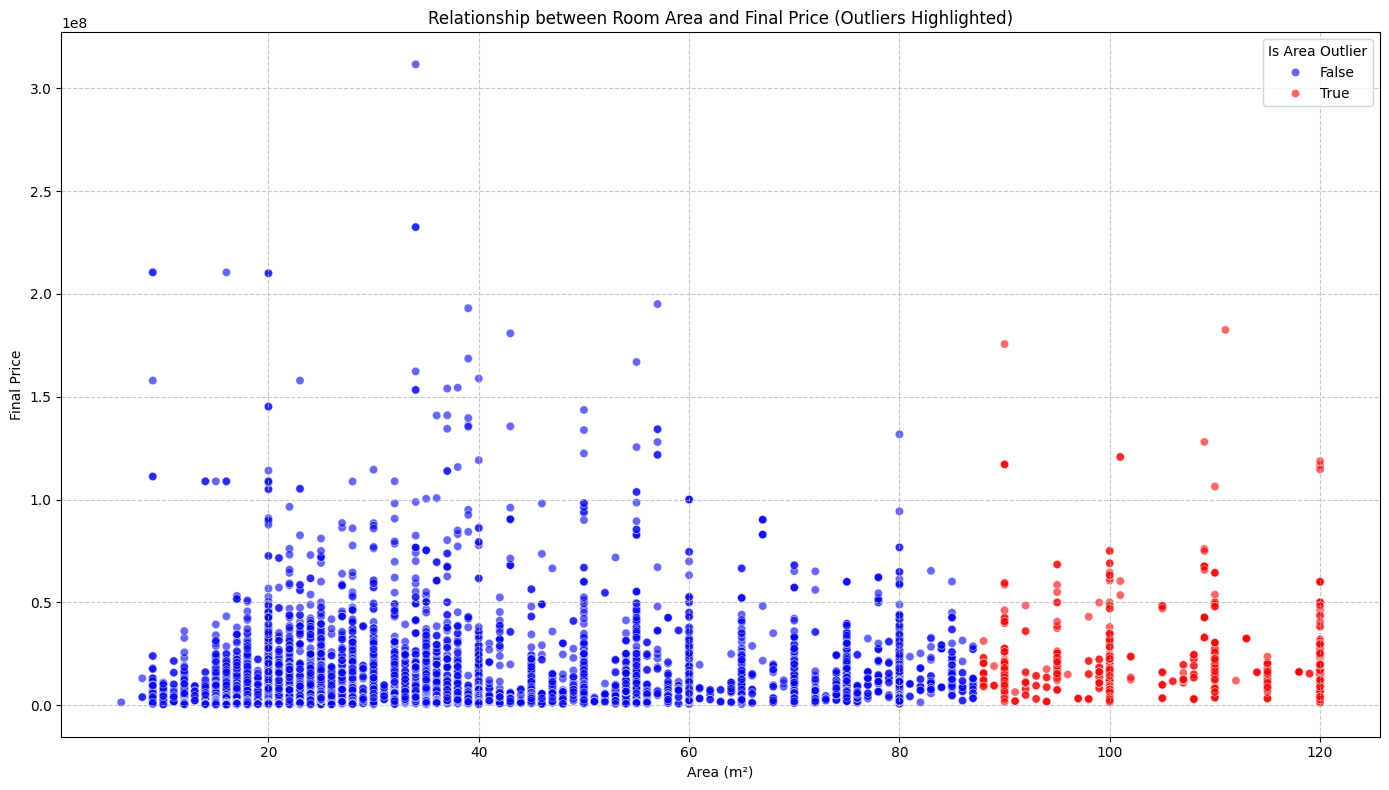

In [ ]:
# Calculate Q1, Q3, and IQR for 'area_m2'
Q1 = df['area_m2'].quantile(0.25)
Q3 = df['area_m2'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier bounds
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

# Create a new column to identify outliers
df['is_area_outlier'] = ((df['area_m2'] < lower_bound) | (df['area_m2'] > upper_bound))

# Create the scatter plot
plt.figure(figsize=(14, 8))
sns.scatterplot(data=df, x='area_m2', y='final_price', hue='is_area_outlier', palette={True: 'red', False: 'blue'}, alpha=0.6)

plt.title('Relationship between Room Area and Final Price (Outliers Highlighted)')
plt.xlabel('Area (m²)')
plt.ylabel('Final Price')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Is Area Outlier')
plt.tight_layout()
plt.show()


Có một xu hướng tích cực rõ ràng: khi area_m2 tăng lên, final_price cũng có xu hướng tăng. Điều này là hợp lý vì các phòng có diện tích lớn hơn thường có giá cao hơn.


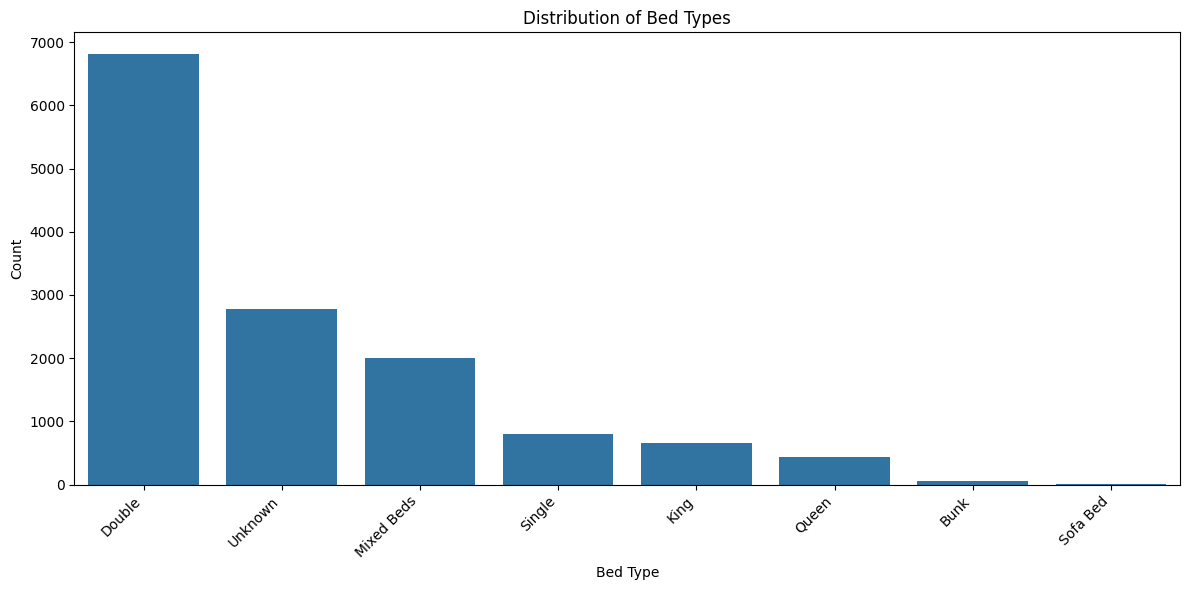

In [ ]:
# Create a count plot for the 'bed_type' column
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='bed_type', order = df['bed_type'].value_counts().index)
plt.title('Distribution of Bed Types')
plt.xlabel('Bed Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

/tmp/ipython-input-522957614.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='room_class', y='area_m2', palette='viridis')


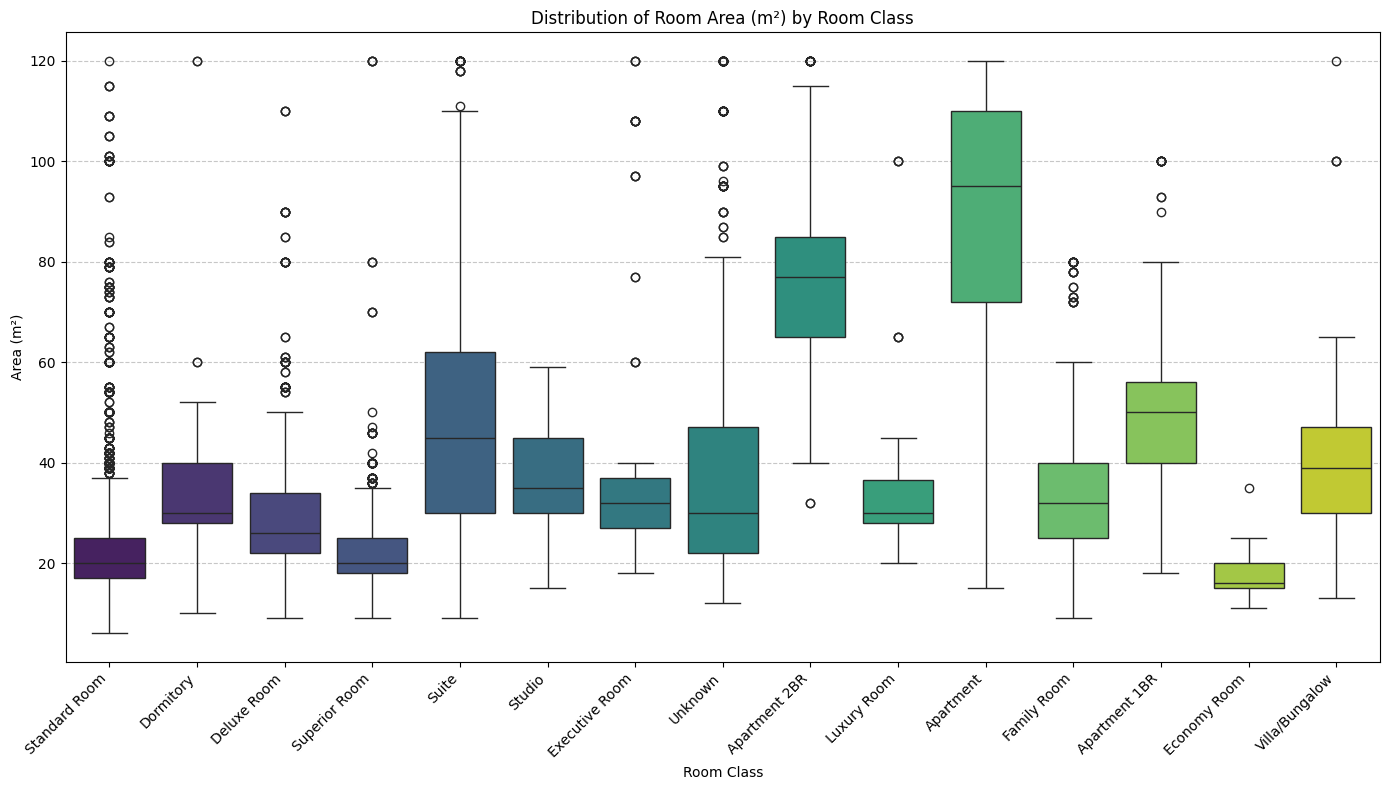

In [ ]:
# Boxplot of area_m2 by room_class
plt.figure(figsize=(14, 8))
sns.boxplot(data=df, x='room_class', y='area_m2', palette='viridis')
plt.title('Distribution of Room Area (m²) by Room Class')
plt.xlabel('Room Class')
plt.ylabel('Area (m²)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Sự chồng lấn và outliers: Có sự chồng lấn về diện tích giữa các loại phòng, ví dụ một số Standard Room có diện tích tương đương với Deluxe Room. Điều này có thể do định nghĩa của 'room_class' không chỉ dựa vào diện tích mà còn các yếu tố khác như tiện nghi, nội thất. Ngoài ra, sự xuất hiện của các outliers diện tích rất lớn trong hầu hết các loại phòng (đặc biệt là Suite, Family Room) cho thấy có những phòng đặc biệt lớn trong từng phân loại.

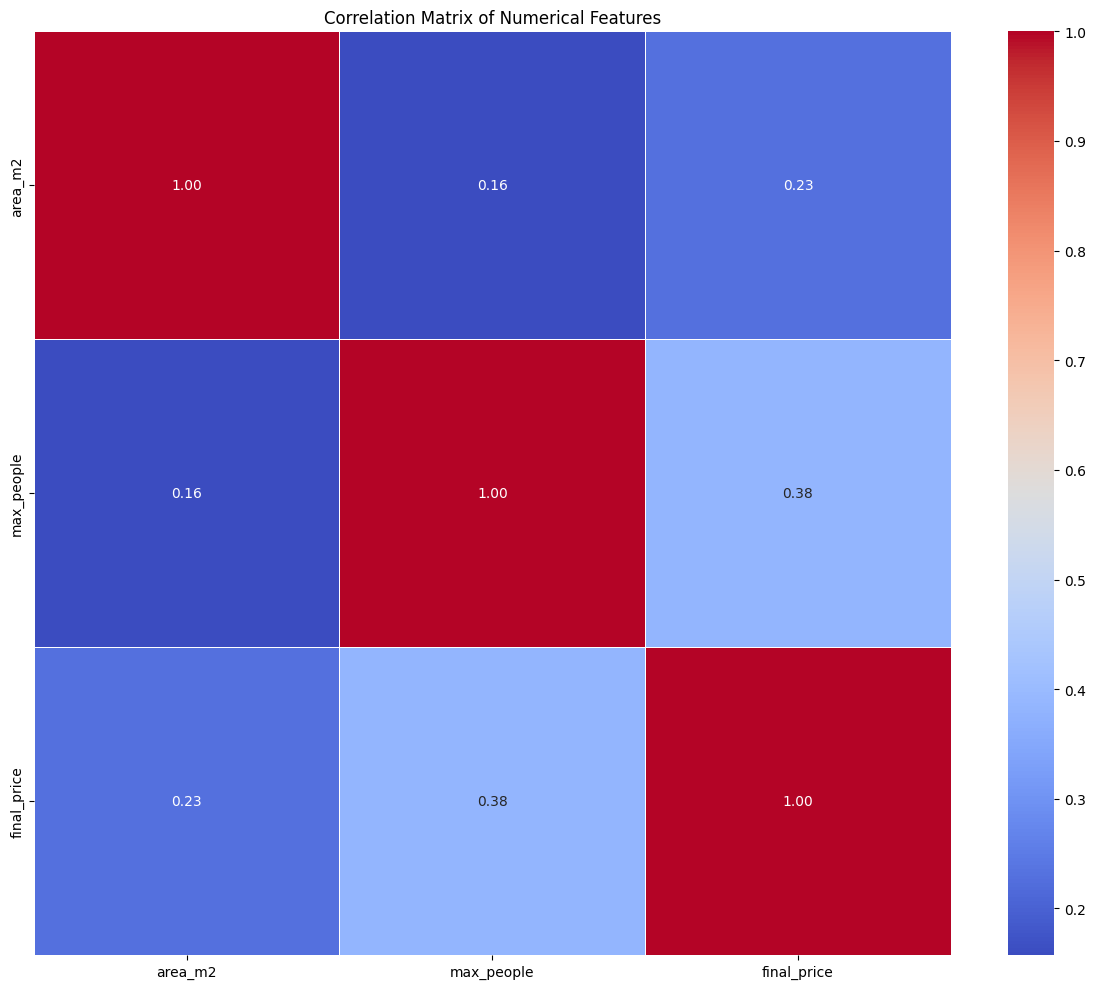

In [ ]:
# Select only numerical columns for correlation calculation
# Exclude 'is_area_outlier' as it's a boolean (binary) derived feature
numerical_df = df.select_dtypes(include=['number']).drop(columns=['is_area_outlier'], errors='ignore')

# Calculate the correlation matrix
correlation_matrix = numerical_df.corr()

# Create the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix of Numerical Features')
plt.tight_layout()
plt.show()